In [60]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [27]:
inf=pd.read_csv("influence_data.csv")
inf

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [31]:
inf_id=inf["influencer_id"]
inf_id

0         759491
1          25462
2          66915
3          71209
4          91438
          ...   
42765     580300
42766     261309
42767     467203
42768    2518003
42769    2896351
Name: influencer_id, Length: 42770, dtype: int64

In [32]:
tmp=inf_id.value_counts()
tmp.describe()
tmp

754032     615
66915      389
894465     319
531986     238
139026     221
          ... 
385879       1
355142       1
1811373      1
209517       1
600069       1
Name: influencer_id, Length: 3774, dtype: int64

In [33]:
fow_id=inf["follower_id"]
fow_id

0             74
1            335
2            335
3            335
4            335
          ...   
42765    3661738
42766    3670556
42767    3670556
42768    3670556
42769    3670556
Name: follower_id, Length: 42770, dtype: int64

In [6]:
fow_id.value_counts()

141683     47
884686     44
387530     43
758444     41
124492     40
           ..
3606027     1
253296      1
146796      1
353145      1
150629      1
Name: follower_id, Length: 5046, dtype: int64

## infer,fower分别是去重后的出现在那两列的人的列表

In [34]:
infer=np.array(inf_id.value_counts().keys()) # infer去重 infer[i]->inf_id
fower=np.array(fow_id.value_counts().keys()) # fower去重
print(infer)
print(fower)

[ 754032   66915  894465 ... 1811373  209517  600069]
[141683 884686 387530 ... 146796 353145 150629]


In [8]:
m=len(infer)
n=len(fower)
print(m,n)

3774 5046


In [9]:
mat=np.zeros((m,n))
mat.shape

(3774, 5046)

In [10]:
inf_map={} # 反向映射
fow_map={}

In [11]:
n=0
for i in infer:
    inf_map[i]=n
    n+=1
inf_map[600069]

3773

In [12]:
m=0
for i in fower:
    fow_map[i]=m
    m+=1
fow_map[150629]

5045

In [13]:
for index, row in inf.iterrows():
    x=inf_map[row["influencer_id"]]
    y=fow_map[row["follower_id"]]
    mat[x][y]=1

In [14]:
mat.sum() # 正确

42770.0

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
m=pd.DataFrame(mat)
m.to_csv('mat.csv')

In [17]:
mat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

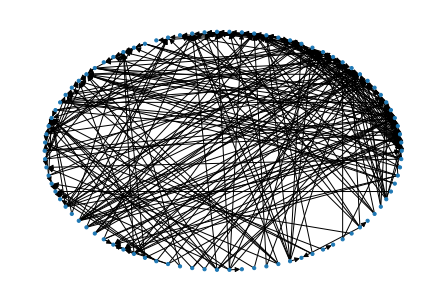

90

In [18]:
G=nx.DiGraph()
nd_size=[]
for i in range(50):
    for j in range(50):
        if m.iloc[i,j]!=0:
            G.add_edges_from([(infer[i],fower[j])])
for i in G:
    nd_size.append(10)
nx.draw(G,node_size=nd_size,pos=nx.circular_layout(G))
plt.show()
G.number_of_nodes()

用两个特征
以上是邻接矩阵和可视化的工作，接下来要做的是：
- 找到描述 music influence 的参量
    - 节点的度数，利用`inf_id.value_counts()`和`fow_id.value_counts()`查看
    - 

In [23]:
music=pd.read_csv("full_music_data.csv")

In [24]:
music

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,['ZZ Top'],[690254],0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster
98336,['ZZ Top'],[690254],0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love
98337,['ZZ Top'],[690254],0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese
98338,['ZZ Top'],[690254],0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster


In [25]:
music_art=pd.read_csv("data_by_artist.csv")
print(music_art)
music_year=pd.read_csv("data_by_year.csv")
print(music_year)

             artist_name  artist_id  danceability    energy   valence  \
0          Frank Sinatra     792507      0.384478  0.238017  0.364288   
1      Vladimir Horowitz     119107      0.343210  0.118844  0.225951   
2            Johnny Cash     816890      0.619803  0.449381  0.680662   
3         Billie Holiday      79016      0.572637  0.201368  0.498934   
4              Bob Dylan      66915      0.512598  0.477932  0.551934   
...                  ...        ...           ...       ...       ...   
5849     Natalie La Rose    3359519      0.830000  0.520000  0.735000   
5850          Sarah Ross    3381566      0.721000  0.944000  0.626000   
5851              Rotimi    3410250      0.637000  0.501000  0.431000   
5852  Jillian Jacqueline    3455945      0.547000  0.672000  0.283000   
5853         Jaira Burns    3639618      0.566000  0.769000  0.385000   

           tempo   loudness  mode  key  acousticness  instrumentalness  \
0     110.181698 -14.271141     1    5      0.735

In [28]:
#inf
genre_map=inf.drop_duplicates(["follower_main_genre"])["follower_main_genre"]
genre_map.index=range(20)
genre_map=genre_map.to_dict()
genre_map # genre对应的字典

{0: 'Pop/Rock',
 1: 'Country',
 2: 'Classical',
 3: 'Electronic',
 4: 'Comedy/Spoken',
 5: 'Easy Listening',
 6: 'R&B;',
 7: 'Stage & Screen',
 8: 'Reggae',
 9: 'Blues',
 10: 'New Age',
 11: 'Latin',
 12: 'Vocal',
 13: 'Jazz',
 14: 'International',
 15: 'Folk',
 16: 'Religious',
 17: 'Unknown',
 18: 'Avant-Garde',
 19: "Children's"}

In [29]:
re_genre_map={}
for i,key in enumerate(genre_map):
    re_genre_map[genre_map[key]]=key
re_genre_map

{'Pop/Rock': 0,
 'Country': 1,
 'Classical': 2,
 'Electronic': 3,
 'Comedy/Spoken': 4,
 'Easy Listening': 5,
 'R&B;': 6,
 'Stage & Screen': 7,
 'Reggae': 8,
 'Blues': 9,
 'New Age': 10,
 'Latin': 11,
 'Vocal': 12,
 'Jazz': 13,
 'International': 14,
 'Folk': 15,
 'Religious': 16,
 'Unknown': 17,
 'Avant-Garde': 18,
 "Children's": 19}

In [35]:
person=np.hstack((infer,fower))
print(infer.shape,fower.shape,person.shape)
person=np.unique(person)
print(person.shape)
person=pd.DataFrame(person)
person

(3774,) (5046,) (8820,)
(5603,)


,0
0,74
1,335
2,441
3,589
4,1097
...,...
5598,3639618
5599,3659356
5600,3661296
5601,3661738


In [36]:
inf[inf["influencer_id"]>0].empty
person

,0
0,74
1,335
2,441
3,589
4,1097
...,...
5598,3639618
5599,3659356
5600,3661296
5601,3661738


In [25]:
inf

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [37]:
inf_col=inf.loc[:,["influencer_id","influencer_name","influencer_main_genre","influencer_active_start"]]
inf_col.columns =["id","name","genre","year"]
inf_col
fow_col=inf.loc[:,["follower_id","follower_name","follower_main_genre","follower_active_start"]]
fow_col.columns =["id","name","genre","year"]
per_col=pd.concat([inf_col,fow_col])
#per_col.index=range(85540)
per_col

,id,name,genre,year
0,759491,The Exploited,Pop/Rock,1980
1,25462,Tricky,Electronic,1990
2,66915,Bob Dylan,Pop/Rock,1960
3,71209,Leonard Cohen,Pop/Rock,1950
4,91438,The Gun Club,Pop/Rock,1980
...,...,...,...,...
42765,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,3670556,Trinidad Cardona,R&B;,2010
42767,3670556,Trinidad Cardona,R&B;,2010
42768,3670556,Trinidad Cardona,R&B;,2010


In [38]:
per_map=per_col.drop_duplicates(["id"])
#per_map[per_map.id==71209]["genre"]
per_map[per_map.id==178301].iloc[0,2]

'Electronic'

In [39]:
def getGenre(id):
    try:
        return per_map[per_map.id==id].iloc[0,2]
    except:
        return -1
getGenre(178301)

'Electronic'

In [67]:
music

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,['ZZ Top'],[690254],0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster
98336,['ZZ Top'],[690254],0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love
98337,['ZZ Top'],[690254],0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese
98338,['ZZ Top'],[690254],0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster


## music里添加genre

In [120]:
tmp=0
for i,r in music.iterrows():
    m=r["artists_id"].find(',')
    Id=0
    if m!=-1:
        Id=int(r["artists_id"][1:m])
    else:
        Id=int(r["artists_id"][1:-1])
    music.loc[i,"genre"]=getGenre(Id)
    if music.loc[i,"genre"]!=-1:
        music.loc[i,"genre_id"]=re_genre_map[music.loc[i,"genre"]]
    else:
        music.loc[i,"genre_id"]=-1
music

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,...,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic,3.0
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,...,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic,3.0
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,...,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic,3.0
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,...,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;,6.0
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,...,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,['ZZ Top'],[690254],0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,...,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,Pop/Rock,0.0
98336,['ZZ Top'],[690254],0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,...,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,Pop/Rock,0.0
98337,['ZZ Top'],[690254],0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,...,0.1250,0.0370,0,158400,31,1987,1987,Balinese,Pop/Rock,0.0
98338,['ZZ Top'],[690254],0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,...,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,Pop/Rock,0.0


In [122]:
music.to_csv("music_modify.csv")

In [51]:
music_modify=pd.read_csv("music_modify.csv")
music_modify=music_modify.drop("Unnamed: 0",axis=1)

In [264]:
music_modify

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,...,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic,3.0
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,...,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic,3.0
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,...,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic,3.0
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,...,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;,6.0
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,...,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,['ZZ Top'],[690254],0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,...,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,Pop/Rock,0.0
98336,['ZZ Top'],[690254],0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,...,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,Pop/Rock,0.0
98337,['ZZ Top'],[690254],0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,...,0.1250,0.0370,0,158400,31,1987,1987,Balinese,Pop/Rock,0.0
98338,['ZZ Top'],[690254],0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,...,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,Pop/Rock,0.0


## 多人
先存在multi_id.csv里面，以后再说
这里还是-1，也没有处理过

In [265]:
multi_id=music_modify[music_modify['artists_id'].str.contains(',') ]
multi_id.to_csv("multi_id.csv")
multi_id # 多人的

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
13,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.514,0.327,0.602,126.221,-10.422,1,8,0.8410,...,0.0717,0.0366,0,233773,11,1956,1/1/1956,Boogie *****,Vocal,12.0
14,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.547,0.394,0.539,127.598,-10.591,1,6,0.7240,...,0.0789,0.0511,0,215667,9,1956,1/1/1956,Opus *,Vocal,12.0
15,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.611,0.506,0.766,152.032,-6.129,1,8,0.9620,...,0.0533,0.0559,0,187560,17,1941,1941,Thanks For The Boogie Ride,Vocal,12.0
16,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.570,0.523,0.783,76.272,-5.531,1,8,0.9610,...,0.0543,0.0720,0,187507,1,1932,1932,Thanks For The Boogie Ride,Vocal,12.0
17,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.519,0.345,0.535,133.331,-9.508,1,8,0.8040,...,0.0739,0.0386,0,204000,14,1956,1/1/1956,Let Me *** Uptown,Vocal,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98180,"['Zhu', 'Skrillex']","[1902858, 2365087]",0.776,0.715,0.502,99.951,-6.587,0,5,0.0971,...,0.2470,0.0505,1,231813,63,2016,7/29/2016,Working For It,-1,-1.0
98197,"['Zion & Lennox', 'J Balvin']","[695943, 2385504]",0.832,0.772,0.704,96.016,-5.429,1,10,0.0559,...,0.4400,0.1000,0,209453,73,2016,9/30/2016,Otra vez (feat. J Balvin),Latin,11.0
98212,"['Zoot Sims', 'Al Cohn', 'Phil Woods']","[228087, 504169, 848572]",0.607,0.339,0.735,126.119,-13.798,0,0,0.7840,...,0.8620,0.0362,0,538600,13,1959,1/1/1959,"Wee Dot - Live At The Half Note, NYC, ****",Jazz,13.0
98213,"['Zoot Sims', 'Al Cohn']","[228087, 504169]",0.470,0.403,0.891,141.634,-14.050,0,5,0.7210,...,0.9630,0.0516,0,548200,10,1959,1/1/1959,"Lover Come Back To Me - Live At The Half Note,...",Jazz,13.0


## 单人
此处把-1都转化为unknown

In [172]:
no_multi_id=music_modify[~music_modify['artists_id'].str.contains(',') ]
un=no_multi_id[no_multi_id["genre_id"]==-1]
un=un.copy()
m=un.shape[0]
b=["Unknown"]*m
un["genre"]=b
un["genre_id"]=[17]*m
no_multi_id=no_multi_id[no_multi_id["genre_id"]!=-1]
no_multi_id=pd.concat([no_multi_id,un])
no_multi_id 

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,...,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic,3.0
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,...,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic,3.0
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,...,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic,3.0
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,...,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;,6.0
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,...,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98139,['Zeca Pagodinho'],[600637],0.731,0.774,0.893,104.760,-10.110,1,11,0.59000,...,0.2310,0.2320,0,276867,37,2002,1/1/2002,Deixa A Vida Me Levar,Unknown,17.0
98181,['Zhu'],[1902858],0.514,0.582,0.621,99.996,-8.835,1,6,0.02090,...,0.0937,0.1010,0,252235,58,2016,7/29/2016,Hometown ****,Unknown,17.0
98182,['Zhu'],[1902858],0.867,0.477,0.614,124.979,-7.183,0,9,0.00843,...,0.1130,0.0490,0,223480,62,2014,9/11/2014,Faded,Unknown,17.0
98183,['Zhu'],[1902858],0.786,0.706,0.313,120.011,-6.212,0,9,0.25100,...,0.1420,0.0537,0,255093,61,2014,9/11/2014,Cocaine Model,Unknown,17.0


得到结论，explict==1不能代表一个类

In [208]:
ex=no_multi_id[no_multi_id["explicit"]==1]
print(no_multi_id["genre"].value_counts())
print(ex["genre"].value_counts()/no_multi_id["genre"].value_counts())

Pop/Rock          46454
R&B;               9839
Country            7097
Jazz               6055
Vocal              5978
Latin              4348
Unknown            2212
Classical          2206
Folk               1383
International      1359
Reggae             1345
Electronic         1196
Blues              1179
Stage & Screen      939
Easy Listening      796
Religious           682
Comedy/Spoken       321
New Age             267
Avant-Garde         221
Children's           53
Name: genre, dtype: int64
Avant-Garde            NaN
Blues             0.001696
Children's             NaN
Classical              NaN
Comedy/Spoken     0.208723
Country           0.003804
Easy Listening         NaN
Electronic        0.076087
Folk              0.000723
International     0.025018
Jazz              0.000330
Latin             0.011500
New Age                NaN
Pop/Rock          0.045809
R&B;              0.095437
Reggae            0.021561
Religious              NaN
Stage & Screen         NaN
Unknown 

得到结论，mode不能代表一个类

In [210]:
mo=no_multi_id[no_multi_id["mode"]==0]
print(mo["genre"].value_counts())
print(mo["genre"].value_counts()/no_multi_id["genre"].value_counts())

Pop/Rock          12082
R&B;               3686
Jazz               2538
Vocal              1722
Latin              1364
Unknown             725
Electronic          538
Classical           535
Country             483
Reggae              473
International       445
Stage & Screen      294
Folk                280
Blues               270
Easy Listening      239
Religious           128
New Age              85
Avant-Garde          84
Comedy/Spoken        71
Children's            7
Name: genre, dtype: int64
Avant-Garde       0.380090
Blues             0.229008
Children's        0.132075
Classical         0.242520
Comedy/Spoken     0.221184
Country           0.068057
Easy Listening    0.300251
Electronic        0.449833
Folk              0.202458
International     0.327447
Jazz              0.419158
Latin             0.313707
New Age           0.318352
Pop/Rock          0.260085
R&B;              0.374632
Reggae            0.351673
Religious         0.187683
Stage & Screen    0.313099
Unknown 

New Age的"instrumentalness">0.10的占比超过了85%，是否可以说明...

In [266]:
ins=no_multi_id[no_multi_id["instrumentalness"]>0.05]
print(ins["genre"].value_counts())
print(ins["genre"].value_counts()/no_multi_id["genre"].value_counts())

Pop/Rock          9676
Jazz              3777
Classical         1552
Unknown           1217
R&B;               854
Electronic         722
Stage & Screen     644
Easy Listening     619
Country            428
International      428
Latin              374
Vocal              351
Reggae             251
New Age            240
Blues              240
Folk               197
Avant-Garde         57
Religious           26
Children's           3
Comedy/Spoken        2
Name: genre, dtype: int64
Avant-Garde       0.257919
Blues             0.203562
Children's        0.056604
Classical         0.703536
Comedy/Spoken     0.006231
Country           0.060307
Easy Listening    0.777638
Electronic        0.603679
Folk              0.142444
International     0.314937
Jazz              0.623782
Latin             0.086017
New Age           0.898876
Pop/Rock          0.208292
R&B;              0.086797
Reggae            0.186617
Religious         0.038123
Stage & Screen    0.685836
Unknown           0.550181
V

In [267]:
evaluation = np.array(ins["genre"].value_counts()/no_multi_id["genre"].value_counts())
print(evaluation)

[0.25791855 0.20356234 0.05660377 0.70353581 0.00623053 0.06030717
 0.77763819 0.60367893 0.14244396 0.31493745 0.623782   0.08601656
 0.8988764  0.20829207 0.08679744 0.1866171  0.03812317 0.685836
 0.55018083 0.05871529]


In [268]:
Idx = np.flipud(np.argsort(evaluation))
evaluation_sorted = evaluation[Idx]

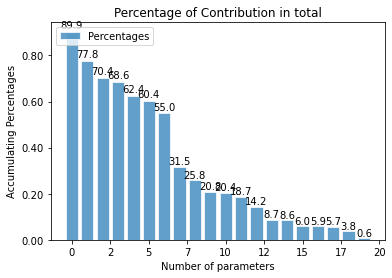

In [269]:
import matplotlib.ticker as ticker
formatter_x = ticker.FormatStrFormatter('%d')
formatter_y = ticker.FormatStrFormatter('%1.2f')

# Number's format settings...
fig, ax = plt.subplots(1)
ax.xaxis.set_major_formatter(formatter_x)
ax.yaxis.set_major_formatter(formatter_y)


plt.title("Percentage of Contribution in total")
plt.xlabel("Number of parameters")
plt.ylabel("Accumulating Percentages")

# you can adjust our parameters here.
rects_fig = plt.bar(np.arange(20), evaluation_sorted, label = "Percentages", alpha = 0.7) 
def add_labels(fig):
    for rect in fig:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.01*height, '{:.1f}'.format(height*100), 
                 ha='center',  va='bottom', fontsize=10)
        rect.set_edgecolor('white')
add_labels(rects_fig)
plt.legend(loc = "upper left")
plt.show()



### liveness可以分离Comedy/Spoken？

In [254]:
liv=no_multi_id[no_multi_id["liveness"]>0.20]
print(liv["genre"].value_counts())
print(liv["genre"].value_counts()/no_multi_id["genre"].value_counts())

Pop/Rock          16230
R&B;               3045
Vocal              2079
Country            2071
Jazz               1481
Latin              1425
Classical           611
Unknown             583
International       443
Electronic          390
Blues               383
Reggae              373
Folk                299
Religious           257
Comedy/Spoken       251
Stage & Screen      238
Easy Listening      196
Avant-Garde          58
New Age              28
Children's           22
Name: genre, dtype: int64
Avant-Garde       0.262443
Blues             0.324852
Children's        0.415094
Classical         0.276972
Comedy/Spoken     0.781931
Country           0.291813
Easy Listening    0.246231
Electronic        0.326087
Folk              0.216197
International     0.325975
Jazz              0.244591
Latin             0.327737
New Age           0.104869
Pop/Rock          0.349378
R&B;              0.309483
Reggae            0.277323
Religious         0.376833
Stage & Screen    0.253461
Unknown 

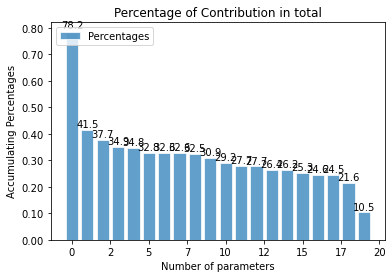

In [255]:
evaluation_liv = np.array(liv["genre"].value_counts()/no_multi_id["genre"].value_counts())
Idx = np.flipud(np.argsort(evaluation_liv))
evaluation_sorted_liv = evaluation_liv[Idx]
import matplotlib.ticker as ticker
formatter_x = ticker.FormatStrFormatter('%d')
formatter_y = ticker.FormatStrFormatter('%1.2f')

# Number's format settings...
fig, ax = plt.subplots(1)
ax.xaxis.set_major_formatter(formatter_x)
ax.yaxis.set_major_formatter(formatter_y)


plt.title("Percentage of Contribution in total")
plt.xlabel("Number of parameters")
plt.ylabel("Accumulating Percentages")

# you can adjust our parameters here.
rects_fig = plt.bar(np.arange(20), evaluation_sorted_liv, label = "Percentages", alpha = 0.7) 
def add_labels(fig):
    for rect in fig:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.01*height, '{:.1f}'.format(height*100), 
                 ha='center',  va='bottom', fontsize=10)
        rect.set_edgecolor('white')
add_labels(rects_fig)
plt.legend(loc = "upper left")
plt.show()


### speechiness基本可以分离Comedy/Spoken，还有Reggae也比较大

In [257]:
spe=no_multi_id[no_multi_id["speechiness"]>0.20]
print(spe["genre"].value_counts())
print(spe["genre"].value_counts()/no_multi_id["genre"].value_counts())

Pop/Rock          1249
R&B;               749
Reggae             293
Comedy/Spoken      259
Vocal              197
Country            129
Latin              126
International      123
Jazz               120
Classical           93
Electronic          89
Unknown             61
Folk                61
Stage & Screen      38
Blues               36
Religious           30
Easy Listening       9
Avant-Garde          6
Children's           5
Name: genre, dtype: int64
Avant-Garde       0.027149
Blues             0.030534
Children's        0.094340
Classical         0.042158
Comedy/Spoken     0.806854
Country           0.018177
Easy Listening    0.011307
Electronic        0.074415
Folk              0.044107
International     0.090508
Jazz              0.019818
Latin             0.028979
New Age                NaN
Pop/Rock          0.026887
R&B;              0.076126
Reggae            0.217844
Religious         0.043988
Stage & Screen    0.040469
Unknown           0.027577
Vocal             0.0329

posx and posy should be finite values
posx and posy should be finite values


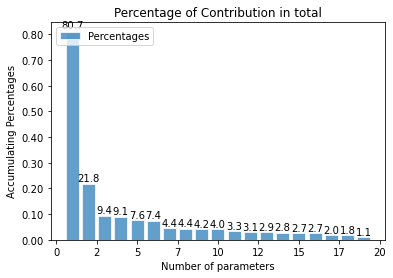

In [258]:
evaluation_spe = np.array(spe["genre"].value_counts()/no_multi_id["genre"].value_counts())
Idx = np.flipud(np.argsort(evaluation_spe))
evaluation_sorted_spe = evaluation_spe[Idx]
import matplotlib.ticker as ticker
formatter_x = ticker.FormatStrFormatter('%d')
formatter_y = ticker.FormatStrFormatter('%1.2f')

# Number's format settings...
fig, ax = plt.subplots(1)
ax.xaxis.set_major_formatter(formatter_x)
ax.yaxis.set_major_formatter(formatter_y)


plt.title("Percentage of Contribution in total")
plt.xlabel("Number of parameters")
plt.ylabel("Accumulating Percentages")

# you can adjust our parameters here.
rects_fig = plt.bar(np.arange(20), evaluation_sorted_spe, label = "Percentages", alpha = 0.7) 
def add_labels(fig):
    for rect in fig:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.01*height, '{:.1f}'.format(height*100), 
                 ha='center',  va='bottom', fontsize=10)
        rect.set_edgecolor('white')
add_labels(rects_fig)
plt.legend(loc = "upper left")
plt.show()


In [263]:
dur=no_multi_id[no_multi_id["duration_ms"]>2e5]
print(dur["genre"].value_counts())
print(dur["genre"].value_counts()/no_multi_id["genre"].value_counts())

Pop/Rock          30907
R&B;               6631
Jazz               4223
Country            2961
Latin              2494
Vocal              1716
Classical          1370
Unknown            1307
Electronic          958
Reggae              917
International       860
Religious           546
Folk                516
Blues               471
Stage & Screen      396
New Age             193
Easy Listening      159
Comedy/Spoken       137
Avant-Garde          55
Children's            6
Name: genre, dtype: int64
Avant-Garde       0.248869
Blues             0.399491
Children's        0.113208
Classical         0.621034
Comedy/Spoken     0.426791
Country           0.417219
Easy Listening    0.199749
Electronic        0.801003
Folk              0.373102
International     0.632818
Jazz              0.697440
Latin             0.573597
New Age           0.722846
Pop/Rock          0.665325
R&B;              0.673951
Reggae            0.681784
Religious         0.800587
Stage & Screen    0.421725
Unknown 

### 随机打乱

In [173]:
music_shuffled=shuffle(no_multi_id)
music_shuffled

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
66118,['Paco de Lucía'],[82639],0.427,0.806,0.891,141.986,-12.626,0,5,0.645000,...,0.1200,0.0428,0,134693,34,1969,1/1/1969,Tico Tico,Latin,11.0
38385,['GWAR'],[655547],0.448,0.930,0.407,94.629,-9.633,1,1,0.000014,...,0.0754,0.0657,0,215533,34,1990,1990,The Salaminizer,Pop/Rock,0.0
71114,['Ray Charles'],[46861],0.665,0.645,0.749,78.115,-9.181,1,3,0.613000,...,0.3300,0.0352,0,204600,35,1961,1961,The Right Time,R&B;,6.0
9506,['Asking Alexandria'],[1590871],0.446,0.761,0.336,134.971,-4.141,0,3,0.000569,...,0.1820,0.0320,0,242593,57,2013,8/6/2013,Moving On,Pop/Rock,0.0
11928,['Bill Cosby'],[70534],0.641,0.444,0.741,78.101,-16.589,1,6,0.945000,...,0.7000,0.9500,0,58240,10,1964,1964,Oops!,Comedy/Spoken,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34965,['Freddie Jackson'],[180449],0.714,0.613,0.524,143.933,-6.627,1,1,0.415000,...,0.0598,0.0381,0,244227,51,2006,1/1/2006,Rock Me ******* (For Old Times Sake),R&B;,6.0
91991,['Thrice'],[494038],0.356,0.914,0.149,136.104,-5.698,1,6,0.001080,...,0.1390,0.0689,0,180027,44,2002,2/5/2002,Deadbolt,Pop/Rock,0.0
69881,['Queens of the Stone Age'],[376422],0.437,0.895,0.468,109.113,-4.640,1,0,0.003590,...,0.0755,0.0304,0,295632,49,1998,9/22/1998,Mexicola,Pop/Rock,0.0
17794,['Céline Dion'],[186185],0.546,0.519,0.247,140.054,-9.072,1,8,0.360000,...,0.2400,0.0291,0,342400,68,1993,11/9/1993,The Power of Love,Pop/Rock,0.0


In [66]:
genre_map

{0: 'Pop/Rock',
 1: 'Country',
 2: 'Classical',
 3: 'Electronic',
 4: 'Comedy/Spoken',
 5: 'Easy Listening',
 6: 'R&B;',
 7: 'Stage & Screen',
 8: 'Reggae',
 9: 'Blues',
 10: 'New Age',
 11: 'Latin',
 12: 'Vocal',
 13: 'Jazz',
 14: 'International',
 15: 'Folk',
 16: 'Religious',
 17: 'Unknown',
 18: 'Avant-Garde',
 19: "Children's"}

In [176]:
Pop=music_shuffled[music_shuffled["genre_id"]==0]
Pop.to_csv("./genre/Pop.csv")
# Pop

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
38385,['GWAR'],[655547],0.448,0.930,0.4070,94.629,-9.633,1,1,0.000014,...,0.0754,0.0657,0,215533,34,1990,1990,The Salaminizer,Pop/Rock,0.0
9506,['Asking Alexandria'],[1590871],0.446,0.761,0.3360,134.971,-4.141,0,3,0.000569,...,0.1820,0.0320,0,242593,57,2013,8/6/2013,Moving On,Pop/Rock,0.0
42119,['Jason Isbell'],[562615],0.633,0.104,0.2240,127.933,-16.632,1,4,0.871000,...,0.1120,0.0340,0,242053,51,2015,7/17/2015,***** Trap Town,Pop/Rock,0.0
8184,['Annie Lennox'],[585249],0.365,0.316,0.0636,119.821,-11.666,1,2,0.626000,...,0.1130,0.0293,0,263636,41,1992,4/2/1992,Cold,Pop/Rock,0.0
91160,['The Who'],[577627],0.152,0.694,0.0181,79.201,-25.055,0,10,0.345000,...,0.3310,0.1000,0,129880,32,1973,10/19/1973,I Am The Sea,Pop/Rock,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92003,['Throbbing Gristle'],[926604],0.347,0.591,0.0399,83.065,-20.368,1,2,0.599000,...,0.1010,0.1340,0,249023,19,1978,12/4/1978,Hamburger Lady - Remastered,Pop/Rock,0.0
91991,['Thrice'],[494038],0.356,0.914,0.1490,136.104,-5.698,1,6,0.001080,...,0.1390,0.0689,0,180027,44,2002,2/5/2002,Deadbolt,Pop/Rock,0.0
69881,['Queens of the Stone Age'],[376422],0.437,0.895,0.4680,109.113,-4.640,1,0,0.003590,...,0.0755,0.0304,0,295632,49,1998,9/22/1998,Mexicola,Pop/Rock,0.0
17794,['Céline Dion'],[186185],0.546,0.519,0.2470,140.054,-9.072,1,8,0.360000,...,0.2400,0.0291,0,342400,68,1993,11/9/1993,The Power of Love,Pop/Rock,0.0


In [177]:
Cou=music_shuffled[music_shuffled["genre_id"]==1]
Cou.to_csv("./genre/Cou.csv")
# Cou

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
36841,['Glen Campbell'],[664378],0.561,0.608,0.566,75.665,-5.517,1,7,0.7480,...,0.1850,0.0253,0,166347,26,1970,1/1/1970,Home *****,Country,1.0
46932,['Johnny Lee'],[240267],0.676,0.424,0.595,120.089,-15.863,1,7,0.4540,...,0.1580,0.0300,0,170773,32,1980,5/6/1980,One in a Million,Country,1.0
6608,['Alan Jackson'],[605375],0.699,0.477,0.830,118.382,-9.339,1,2,0.2910,...,0.1640,0.0310,0,185427,54,1989,1989,Pop a Top,Country,1.0
48664,['June Carter Cash'],[838300],0.407,0.283,0.449,129.129,-12.937,1,7,0.7930,...,0.2560,0.0302,0,288960,5,1952,1952,Song To John,Country,1.0
6590,['Alan Jackson'],[605375],0.750,0.508,0.599,105.651,-10.693,1,7,0.1860,...,0.2040,0.0259,0,177507,33,1992,10/9/1992,Tropical Depression,Country,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44600,['John Anderson'],[218994],0.652,0.722,0.727,110.751,-10.678,1,9,0.0649,...,0.1660,0.0326,0,179160,45,1998,3/17/1998,Swingin',Country,1.0
72271,['Ricky Van Shelton'],[207127],0.617,0.394,0.451,87.378,-10.789,1,5,0.4990,...,0.2870,0.0243,0,186653,33,1987,1987,I'll Leave This World Loving You,Country,1.0
36213,['George Strait'],[944084],0.711,0.300,0.551,113.006,-12.782,1,8,0.2820,...,0.2600,0.0286,0,170200,20,1983,1/1/1983,Fifteen Years Going Up (And One ***** Coming D...,Country,1.0
49536,['Keith Urban'],[81619],0.694,0.779,0.594,84.975,-6.984,1,0,0.0688,...,0.0803,0.0710,0,221600,63,2016,5/6/2016,"John Cougar, John Deere, John ****",Country,1.0


In [178]:
Cla=music_shuffled[music_shuffled["genre_id"]==2]
Cla.to_csv("./genre/Cla.csv")
# Cla

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
3007,['Wolfgang Amadeus Mozart'],[26350],0.245,0.0473,0.1280,69.457,-23.563,1,0,0.963,...,0.0798,0.0494,0,344640,43,1997,1997,"Mozart: ******** No. ** in G Major, K. *** ""Ei...",Classical,2.0
3343,['Wolfgang Amadeus Mozart'],[26350],0.513,0.3550,0.5180,84.371,-13.625,1,10,0.966,...,0.0805,0.0345,0,350253,0,1938,1938,"Trio No. 3 in B-Flat Major, K. **** III. Alleg...",Classical,2.0
57320,['Maria Callas'],[740576],0.449,0.0743,0.2250,142.619,-24.281,0,10,0.919,...,0.6560,0.3930,0,26693,0,1955,1955,"La Forza del Destino ***** - Remaster), Act I:...",Classical,2.0
3266,['Wolfgang Amadeus Mozart'],[26350],0.410,0.1360,0.5310,142.400,-17.354,1,7,0.988,...,0.0885,0.0354,0,478373,0,1947,1947,"Violin Sonata in G Major, *********** I. Alleg...",Classical,2.0
3377,['Wolfgang Amadeus Mozart'],[26350],0.453,0.1760,0.4930,126.870,-18.243,1,3,0.987,...,0.1550,0.0508,0,229400,9,1955,1955,"Le nozze di Figaro, K. **** Act II Scene *** V...",Classical,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,['Wolfgang Amadeus Mozart'],[26350],0.135,0.0596,0.0395,81.347,-23.393,1,3,0.985,...,0.0671,0.0420,0,618560,0,1954,1/1/1954,"Mozart: Sinfonia concertante in E-Flat Major, ...",Classical,2.0
53105,['Leonard Bernstein'],[239859],0.226,0.0235,0.0760,86.246,-25.565,1,0,0.965,...,0.1250,0.0412,0,282067,0,1950,1950,"**** Theatre Piece for Singers, Players and Da...",Classical,2.0
68448,['Philip Glass'],[849672],0.197,0.1370,0.3170,139.200,-23.758,0,0,0.981,...,0.1010,0.0384,0,385147,38,1979,1979,*********** I. Opening,Classical,2.0
3565,['Wolfgang Amadeus Mozart'],[26350],0.502,0.2700,0.7050,118.636,-14.174,1,7,0.880,...,0.3760,0.0403,0,179907,0,1935,1935,"Mozart: Eine kleine Nachtmusik, K. **** IV. Ro...",Classical,2.0


In [179]:
Ele=music_shuffled[music_shuffled["genre_id"]==3]
Ele
Ele.to_csv("./genre/Ele.csv")

In [180]:
Com=music_shuffled[music_shuffled["genre_id"]==4]
Com
Com.to_csv("./genre/Com.csv")

In [181]:
Eas=music_shuffled[music_shuffled["genre_id"]==5]
Eas
Eas.to_csv("./genre/Eas.csv")

In [182]:
RB=music_shuffled[music_shuffled["genre_id"]==6]
RB
RB.to_csv("./genre/RB.csv")

In [183]:
Sta=music_shuffled[music_shuffled["genre_id"]==7]
Sta
Sta.to_csv("./genre/Sta.csv")

In [184]:
Reg=music_shuffled[music_shuffled["genre_id"]==8]
Reg
Reg.to_csv("./genre/Reg.csv")

In [185]:
Blu=music_shuffled[music_shuffled["genre_id"]==9]
Blu
Blu.to_csv("./genre/Blu.csv")

In [186]:
New=music_shuffled[music_shuffled["genre_id"]==10]
New
New.to_csv("./genre/New.csv")

In [187]:
Lat=music_shuffled[music_shuffled["genre_id"]==11]
Lat
Lat.to_csv("./genre/Lat.csv")

In [188]:
Voc=music_shuffled[music_shuffled["genre_id"]==12]
Voc
Voc.to_csv("./genre/Voc.csv")

In [189]:
Jaz=music_shuffled[music_shuffled["genre_id"]==13]
Jaz
Jaz.to_csv("./genre/Jaz.csv")

In [190]:
Int=music_shuffled[music_shuffled["genre_id"]==14]
Int
Int.to_csv("./genre/Int.csv")

In [191]:
Fol=music_shuffled[music_shuffled["genre_id"]==15]
Fol
Fol.to_csv("./genre/Fol.csv")

In [192]:
Rel=music_shuffled[music_shuffled["genre_id"]==16]
Rel
Rel.to_csv("./genre/Rel.csv")

In [194]:
Unk=music_shuffled[music_shuffled["genre_id"]==17]
Unk.to_csv("./genre/Unk.csv")
Unk

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre,genre_id
95338,['Vladimir Horowitz'],[119107],0.3810,0.0338,0.1160,76.431,-23.149,0,0,0.994000,...,0.1580,0.0369,0,212000,0,1928,1928,"Fantasiestücke, Op. **** Con forza, ***** marcato",Unknown,17.0
95257,['Vladimir Horowitz'],[119107],0.3290,0.2630,0.1260,82.622,-19.664,1,3,0.993000,...,0.1150,0.0421,0,492907,11,1930,1930,"Danse macabre, S. 555 (after Camille Saint-Saens)",Unknown,17.0
64870,['Oasis'],[1426593],0.3720,0.8650,0.4780,174.530,-4.918,1,2,0.000453,...,0.2340,0.0381,0,258733,71,1995,10/2/1995,Wonderwall - Remastered,Unknown,17.0
1330,['Blue Magic'],[53428],0.5100,0.5060,0.7090,143.016,-13.327,1,5,0.257000,...,0.1170,0.0576,0,432587,41,1974,1974,Just Don't Want to Be Lonely,Unknown,17.0
20468,['Chilliwack'],[773383],0.7110,0.7430,0.9660,122.388,-6.769,0,11,0.022700,...,0.2910,0.0613,0,255093,40,1982,1982,Whatcha Gonna Do,Unknown,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80075,['Sy Oliver'],[41702],0.5840,0.5160,0.6950,121.302,-7.005,1,1,0.730000,...,0.0862,0.0453,0,160896,0,1953,8/1/1953,Dragnet,Unknown,17.0
45956,['John Williams'],[1535255],0.0866,0.1150,0.0475,82.360,-22.543,1,10,0.666000,...,0.1280,0.0554,0,169000,37,1993,5/25/1993,The Raptor Attack,Unknown,17.0
46132,['John Williams'],[1535255],0.0908,0.1510,0.0344,85.198,-18.838,1,7,0.799000,...,0.0738,0.0393,0,752720,36,1977,1977,The Visitors / Bye / End ******* The Special E...,Unknown,17.0
95248,['Vladimir Horowitz'],[119107],0.3430,0.1500,0.0784,98.927,-21.367,0,2,0.982000,...,0.1650,0.0371,0,585733,17,1930,1930,"********* Rhapsody No. ** in D Minor, S. *****...",Unknown,17.0


In [195]:
Ava=music_shuffled[music_shuffled["genre_id"]==18]
Ava
Ava.to_csv("./genre/Ava.csv")

In [196]:
Chi=music_shuffled[music_shuffled["genre_id"]==19]
Chi
Chi.to_csv("./genre/Chi.csv")

In [10]:
mat=pd.DataFrame([[1,2],[3,4],[5,6],[7,1],[2,8]])
mat

,0,1
0,1,2
1,3,4
2,5,6
3,7,1
4,2,8


In [11]:
mat['111']=mat.apply(lambda x:"ttd" ,axis=1)
mat.iloc[1,2]="s"
mat

,0,1,111
0,1,2,ttd
1,3,4,s
2,5,6,ttd
3,7,1,ttd
4,2,8,ttd


In [17]:
m=mat[mat["111"]=="ttd"]
m

,0,1,111
0,1,2,ttd
2,5,6,ttd
3,7,1,ttd
4,2,8,ttd


In [18]:
mat[~mat['111'].str.contains('ttd') ]

,0,1,111
1,3,4,s


In [19]:
mat

,0,1,111
0,1,2,ttd
1,3,4,s
2,5,6,ttd
3,7,1,ttd
4,2,8,ttd


In [63]:
shuffle(mat)

,0,1,111
1,3,4,s
3,7,1,ttd
2,5,6,ttd
0,1,2,ttd
4,2,8,ttd


In [150]:
mat["111"]=b
m=mat[mat["111"]=="un"]
m["111"]=b
m

,0,1,111
0,un,2,un
1,un,4,un
2,un,6,un
3,un,1,un
4,un,8,un


In [132]:
b=["un"]*5

In [131]:
b

['un', 'un', 'un']